In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#original_dataset=pd.read_csv("charts.csv")

In [ ]:
#original_dataset.columns

In [ ]:
#original_dataset.head

In [ ]:
#useful_dataset=original_dataset.drop(columns=['trend','chart','date','region','rank'])

In [ ]:
#useful_dataset.head

In [ ]:
#useful_dataset.columns

In [ ]:
#useful_dataset['artist'].value_counts()[0:30]

In [ ]:
#for i in range (1000):
#    if useful_dataset['artist'][i]=='Ed Sheeran':
#        print(useful_dataset['title'][i])

In [ ]:
#cleaned_dataset=useful_dataset.drop_duplicates(subset=['title','artist'])

In [ ]:
#cleaned_dataset['artist'].value_counts()

In [ ]:
#cleaned_dataset['artist']

In [ ]:
#cleaned_dataset.loc[150:160]

In [ ]:
#new_cleaned_dataset=cleaned_dataset.reset_index()

In [ ]:
new_cleaned_dataset = pd.read_csv("charts_light.csv")

In [ ]:
len(new_cleaned_dataset)

In [ ]:
type(new_cleaned_dataset)

In [51]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="########",
                                                           client_secret="########"))

In [ ]:
sample_dataset=new_cleaned_dataset[:3000]

In [ ]:
sample_dataset.head

In [ ]:
#execute this cell if you have a time out error in HTTP
""" import urllib3, socket
from urllib3.connection import HTTPConnection
    
HTTPConnection.default_socket_options = ( 
            HTTPConnection.default_socket_options + [
            (socket.SOL_SOCKET, socket.SO_SNDBUF, 1000000), #1MB in byte
            (socket.SOL_SOCKET, socket.SO_RCVBUF, 1000000)
        ])
"""

In [ ]:
#to collect informations about a list of titles
our_dataset=[]
i = 0
j = 0
while (i<10000):
    try:
        j+=1
        print("Added :",i," - Explored :", j, end='\r')
        track = sp.search(sample_dataset['title'].loc[j], limit=1)["tracks"]['items']
        if(len(track) == 0):
            None
        else:
            track=track[0]

            if track['preview_url'] is not None:
                artist = sp.artist(track['album']["artists"][0]["external_urls"]["spotify"])
                i += 1
                our_dataset.append([track['name'], track['album']['artists'][0]['name'], artist["genres"], track['preview_url'],sp.audio_features(track['id'])[0]])
    except KeyboardInterrupt:
        break
    except Exception as e:
        print(e, "An error has occured, but we continue")

In [ ]:
#testing=np.array(dataset)
our_array=np.array(our_dataset)

In [ ]:
our_array.shape

In [ ]:
our_array

In [ ]:
our_dataframe=pd.DataFrame.from_dict(our_array)

In [ ]:
only_title_dataframe=our_dataframe.drop(columns=[2])

In [ ]:
only_title_dataframe

In [ ]:
all_keys=our_dataframe[2][0].keys()
string_keys=['type', 'id', 'uri', 'track_href', 'analysis_url']

In [ ]:
all_keys

In [ ]:
#transforming
temporary_list=[]

for i in range (1453):
    column=[]
    for elt in all_keys:
        if elt in string_keys:
            #print(type(my_data[2][i][elt]))
            column.append(our_dataframe[2][i][elt])
        else:
            #print(type(float(my_data[2][i][elt])))
            column.append(float(our_dataframe[2][i][elt]))
    temporary_list.append(column)

In [ ]:
print(temporary_list[0])

In [ ]:
new_arrays=np.array(temporary_list,dtype=object)
print(new_arrays.shape)

In [ ]:
print(new_arrays[0])

In [ ]:
mydataframe=pd.DataFrame.from_dict(new_arrays)

In [ ]:
print(mydataframe)

In [ ]:
new_dataframe=mydataframe.rename(columns={ 0 : 'danceability', 1: 'energy', 2: 'key', 3: 'loudness',
                            4: 'mode', 5: 'speechiness', 6: 'acousticness',7:  'instrumentalness',8:  'liveness', 9: 'valence', 10: 'tempo',
                            11: 'type', 12: 'id', 13: 'uri', 14: 'track_href', 15: 'analysis_url', 16: 'duration_ms',17:  'time_signature'
                           })

In [ ]:
new_dataframe

In [ ]:
#Tentative de fusion

In [ ]:
created_dataframe=pd.concat([only_title_dataframe,new_dataframe],axis=1)

In [ ]:
created_dataframe

In [ ]:
new_dataframe['danceability']

In [ ]:
plt.boxplot([new_dataframe['danceability'],new_dataframe['energy'],new_dataframe['key']],labels =["danceability", "energy", "key"], showfliers = False)

In [ ]:
for key in all_keys:
    if key not in string_keys:
        plt.boxplot([new_dataframe[key]],labels=[key],showfliers = False)

In [ ]:
all_keys

In [ ]:
plt.boxplot([new_dataframe['danceability']],labels=['danceability'],showfliers = False)

In [ ]:
plt.boxplot([new_dataframe['energy']],labels=['energy'],showfliers = False)

In [ ]:
plt.boxplot([new_dataframe['key']],labels=['key'],showfliers = False)

In [ ]:
plt.boxplot([new_dataframe['loudness']],labels=['loudness'],showfliers = False)

In [ ]:
testing=pd.read_csv('created.csv') 

In [ ]:
testing

In [ ]:
created_dataframe.to_csv('created.csv', index=False)

In [ ]:
titles=dataset[["title"]]

In [ ]:
titles

In [ ]:
pip install spotipy

In [ ]:
#title = "bellyache"
new=titles.values.tolist()


In [ ]:
dataset[0][2][0]

In [ ]:
len(dataset)
dataset[0][2][0]['danceability']
dataset[0][2][0]['energy']
dataset[0][2][0]['key']
dataset[0][2][0]['mode']
dataset[0][2][0]['speechiness']
dataset[0][2][0]['acousticness']
dataset[0][2][0]['tempo']

In [ ]:
for i in range (200):
    print(dataset[i][0])

In [ ]:
""""def auto_boxplot(data, column, showfliers):

    plt.figure()
    plt.title("Characteristics of " + column)

    plt.boxplot([data[column], benign], labels =["Danceability", "Tempo"], showfliers = showfliers)
    plt.show()"""

In [3]:
#### DATA VISUALIZATION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
original_dataset=pd.read_csv("dataset.csv")

In [6]:
original_dataset.columns

Index(['title', 'artist', 'genre', 'demo', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [7]:
string_keys=['title','artist', 'genre', 'demo', 'id', 'uri', 'track_href', 'analysis_url']

In [8]:
original_dataset.head

<bound method NDFrame.head of                             title              artist  \
0     Vente Pa' Ca (feat. Maluma)        Ricky Martin   
1      Reggaetón Lento (Bailemos)                CNCO   
2                          SAFARI  Tyler, The Creator   
3         Cuando Se Pone a Bailar              Rombai   
4       Otra vez (feat. J Balvin)       Zion & Lennox   
...                           ...                 ...   
9314                   Sweet Scar        Weird Genius   
9315        Lollipop (Ode To Jim)             Alvvays   
9316                         Heal           Tom Odell   
9317               Goodbye Kisses           Joe Hertz   
9318            High Heeled Shoes       Megan McKenna   

                                                  genre  \
0     ['dance pop', 'latin', 'latin pop', 'mexican p...   
1       ['boy band', 'latin', 'latin pop', 'reggaeton']   
2                                    ['hip hop', 'rap']   
3                                        ['cumbia

In [9]:
original_dataset['artist'].value_counts()[0:20]

Various Artists                            178
Bad Bunny                                   52
Patricio Rey y sus Redonditos de Ricota     49
Jorge & Mateus                              28
Ed Sheeran                                  26
Ozuna                                       26
Marília Mendonça                            25
JVG                                         23
J-AX                                        21
Ninho                                       20
Maluma                                      20
BTS                                         19
Future                                      19
Jul                                         18
Wesley Safadão                              18
Bruno Mars                                  17
Jay Chou                                    16
Lil Uzi Vert                                16
Tyler, The Creator                          15
Romeo Santos                                15
Name: artist, dtype: int64

In [10]:
all_keys=original_dataset.keys()

In [11]:
type(original_dataset['energy'][0])

numpy.float64

In [12]:
original_dataset['energy'].mean()

0.6398244777765828

In [13]:
original_dataset['energy'].describe()

count    9319.000000
mean        0.639824
std         0.197846
min         0.000099
25%         0.520000
50%         0.662000
75%         0.787000
max         0.999000
Name: energy, dtype: float64

In [14]:
nan_keys=[]
for key in all_keys:
    if original_dataset[key].isnull().sum()!=0:
        nan_keys.append(key)
        print(key, "has ", original_dataset[key].isnull().sum(), "nan values")

In [15]:
for key in nan_keys:
    if key not in string_keys: 
        original_dataset[key] = original_dataset[key].fillna(original_dataset[key].mean())
    else:
        original_dataset[key] = original_dataset[key].fillna("Unknown")

In [16]:
nan_keys=[]
for key in all_keys:
    if original_dataset[key].isnull().sum()!=0:
        nan_keys.append(key)
        print(key, "has ", original_dataset[key].isnull().sum(), "nan values")

In [17]:
numerical_key=[]
for key in all_keys:
    if key not in string_keys:
        numerical_key.append(key)

In [18]:
numerical_key

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

<AxesSubplot:>

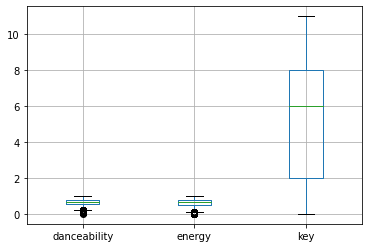

In [19]:
original_dataset.boxplot(column=numerical_key[0:3])

<AxesSubplot:>

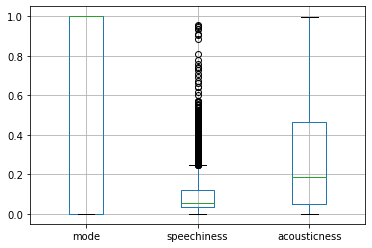

In [20]:
original_dataset.boxplot(column=numerical_key[4:7])

<AxesSubplot:>

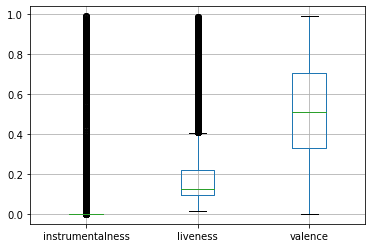

In [21]:
original_dataset.boxplot(column=numerical_key[7:10])

<AxesSubplot:>

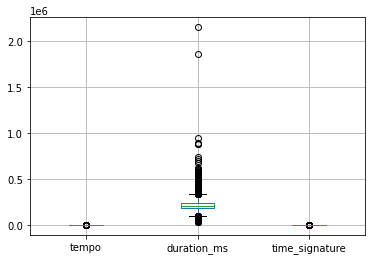

In [22]:
original_dataset.boxplot(column=numerical_key[10:13])

In [23]:
string_keys

['title', 'artist', 'genre', 'demo', 'id', 'uri', 'track_href', 'analysis_url']

In [24]:
type(original_dataset['genre'][0])

str

In [25]:
original_dataset['genre'][0]

"['dance pop', 'latin', 'latin pop', 'mexican pop', 'puerto rican pop']"

In [26]:
for i in range(len(original_dataset['genre'])): 
    line=original_dataset['genre'][i].replace( "'", '')
    line=line.replace('[', '')
    line=line.replace(']', '')
    line=line.replace(' ', '')
    line=list(line.split(","))
    original_dataset['genre'][i]=line

<ipython-input-26-75cf0f28b71d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_dataset['genre'][i]=line


In [27]:
all_genre=[]
for i in range(len(original_dataset['genre'])): 
    for k in range(len(original_dataset['genre'][i])):
        if(original_dataset['genre'][i][k] not in all_genre):
            all_genre.append(original_dataset['genre'][i][k])

In [28]:
len(all_genre)

2039

In [29]:
categories=[]
for genre in all_genre:
    music_genre=[]
    for i in range(len(original_dataset['genre'])):
        if genre in original_dataset['genre'][i]:
            music_genre.append(i)
    categories.append(music_genre)

In [30]:
len(categories)

2039

In [31]:
len(categories[1])

625

In [32]:
songs_by_categories=[]
for i in range (len(categories)):
    songs_by_categories.append(len(categories[i]))

In [33]:
sorted_index_array = np.argsort(np.array(songs_by_categories))
print(sorted_index_array)

[2038 1578 1208 ...    1   17   59]


In [34]:
indexes=(sorted_index_array[-15:])

In [35]:
indexes
most_genre=[all_genre[indexes[i]] for i in range(len(indexes)) ]
most_genre

['mandopop',
 'modernrock',
 'rock',
 'popdance',
 'trap',
 'latinpop',
 'edm',
 'poprap',
 'rap',
 'reggaeton',
 'traplatino',
 'dancepop',
 'latin',
 'pop',
 '']

In [36]:
number_of_songs=[]
for i in range (len(indexes)):
    number_of_songs.append(songs_by_categories[indexes[i]])
number_of_songs

[210, 224, 231, 240, 250, 255, 260, 284, 333, 399, 441, 530, 625, 792, 900]

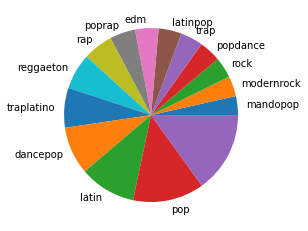

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(number_of_songs, labels = most_genre)
plt.show() 

In [38]:
all_genre

['dancepop',
 'latin',
 'latinpop',
 'mexicanpop',
 'puertoricanpop',
 'boyband',
 'reggaeton',
 'hiphop',
 'rap',
 'cumbiapop',
 'latinhiphop',
 'traplatino',
 'champeta',
 'colombianpop',
 'tropical',
 'vallenato',
 'reggaetoncolombiano',
 'pop',
 'edm',
 'popdance',
 'tropicalhouse',
 'ukdance',
 'ukfunky',
 'cubaton',
 'reggaetonflow',
 'dutchedm',
 'progressivehouse',
 'argentinetelepop',
 'cumbiaparaguaya',
 'latinarenapop',
 'electropop',
 'banda',
 'musicamexicana',
 'norteno',
 'ranchera',
 'corridostumbados',
 'argentinehiphop',
 'trapargentino',
 'bachata',
 'bachatadominicana',
 'cumbiasonidera',
 'indierock',
 'bigroom',
 'poprap',
 'cumbiachilena',
 'cumbiavillera',
 'electrohouse',
 'australiandance',
 'australianpop',
 'girlgroup',
 'post-teenpop',
 'talentshow',
 'viralpop',
 'argentinerock',
 'folkloreargentino',
 'popargentino',
 'dominicanpop',
 'spanishpop',
 'panamanianpop',
 '',
 'cantautor',
 'rockenespanol',
 'modernrock',
 'rock',
 'mexicanhiphop',
 'nuevamusi

In [39]:
type(categories[1])

list

In [40]:
numerical_key

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [41]:
dancepop_only=original_dataset.loc[categories[0]]
latino_only=original_dataset.loc[categories[1]]
boyband_only=original_dataset.loc[categories[5]]

<AxesSubplot:>

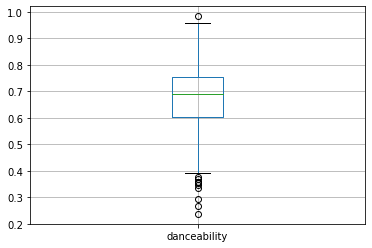

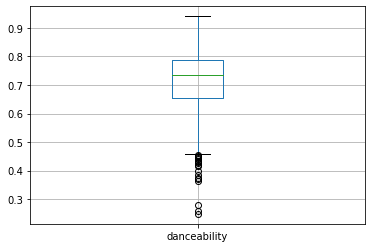

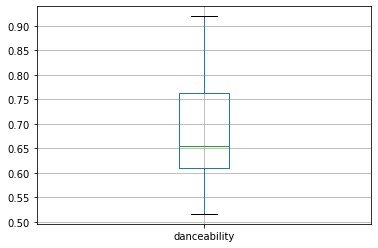

In [42]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[0])

plt.figure()
latino_only.boxplot(column=numerical_key[0])

plt.figure()
boyband_only.boxplot(column=numerical_key[0])

<AxesSubplot:>

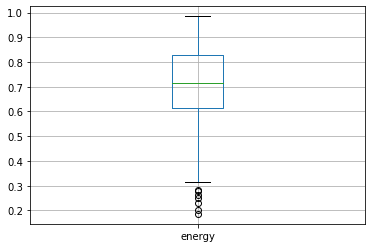

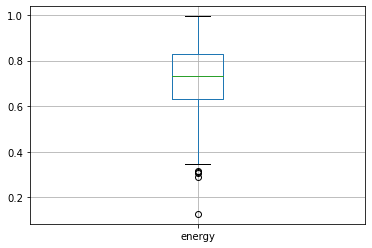

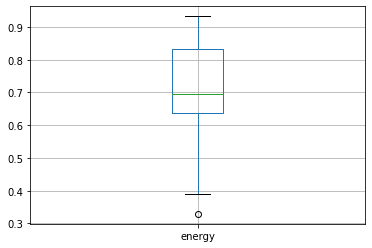

In [43]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[1])

plt.figure()
latino_only.boxplot(column=numerical_key[1])

plt.figure()
boyband_only.boxplot(column=numerical_key[1])

<AxesSubplot:>

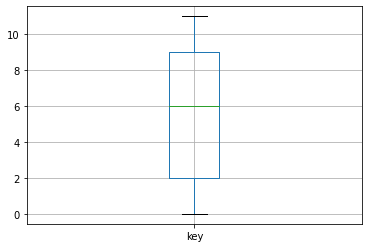

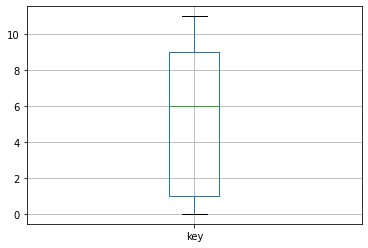

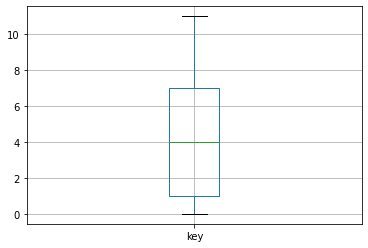

In [44]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[2])

plt.figure()
latino_only.boxplot(column=numerical_key[2])

plt.figure()
boyband_only.boxplot(column=numerical_key[2])

<AxesSubplot:>

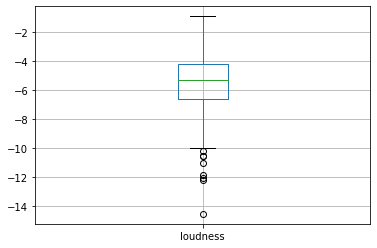

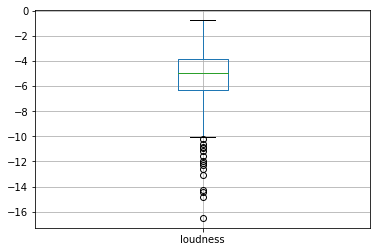

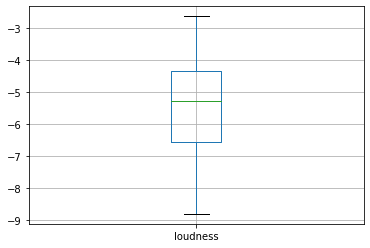

In [45]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[3])

plt.figure()
latino_only.boxplot(column=numerical_key[3])

plt.figure()
boyband_only.boxplot(column=numerical_key[3])

<AxesSubplot:>

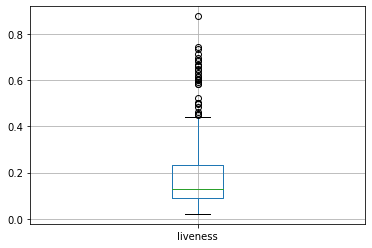

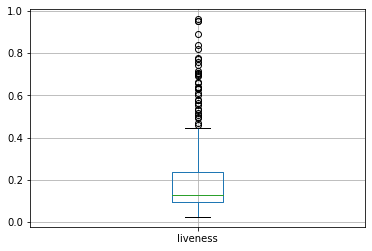

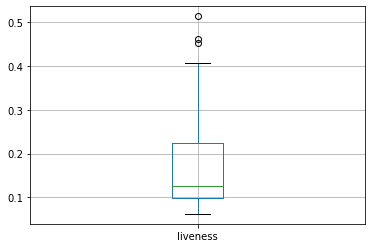

In [46]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[8])

plt.figure()
latino_only.boxplot(column=numerical_key[8])

plt.figure()
boyband_only.boxplot(column=numerical_key[8])

<AxesSubplot:>

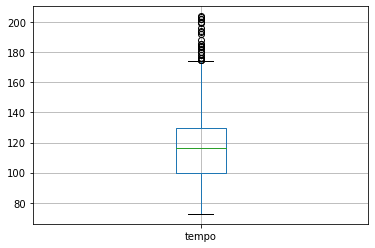

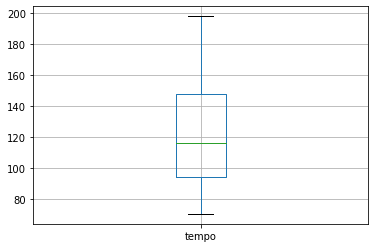

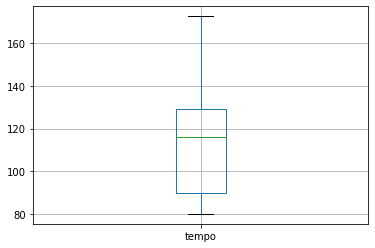

In [47]:
plt.figure()
dancepop_only.boxplot(column=numerical_key[10])

plt.figure()
latino_only.boxplot(column=numerical_key[10])

plt.figure()
boyband_only.boxplot(column=numerical_key[10])

<AxesSubplot:>

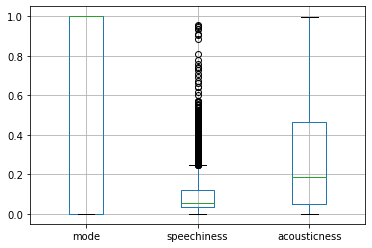

In [48]:
original_dataset.boxplot(column=numerical_key[4:7])

<AxesSubplot:>

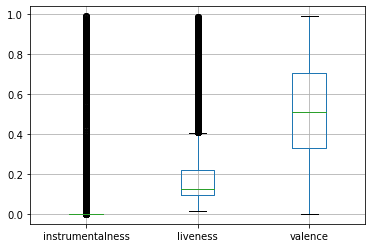

In [49]:
original_dataset.boxplot(column=numerical_key[7:10])

<AxesSubplot:>

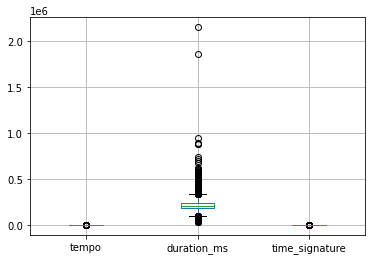

In [50]:
original_dataset.boxplot(column=numerical_key[10:13])